In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

In [22]:
def get_contour(image_path):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    
    # 외곽선 찾기
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # 가장 큰 외곽선 선택
    contour = max(contours, key=cv2.contourArea)

    return contour

# Function to uniformly sample points from the contour
def sample_points(contour, num_points):
    # Calculate the cumulative sum of distances between consecutive points
    distances = np.sqrt((np.diff(contour[:, 0, 0])**2) + (np.diff(contour[:, 0, 1])**2))
    cumulative_distances = np.cumsum(distances)
    cumulative_distances = np.insert(cumulative_distances, 0, 0)

    # Interpolate points along the contour
    uniform_distances = np.linspace(0, cumulative_distances[-1], num_points)
    interp_x = np.interp(uniform_distances, cumulative_distances, contour[:, 0, 0])
    interp_y = np.interp(uniform_distances, cumulative_distances, contour[:, 0, 1])
    return interp_x + 1j * interp_y

# Function to compute Fourier descriptors and reconstruct the contour
def compute_descriptors_and_reconstruct(sampled_contour, num_coefficients):
    # Compute Fourier descriptors
    descriptors = fft(sampled_contour)

    # Zero out all but the first num_coefficients/2 and last num_coefficients/2 coefficients
    descriptors[num_coefficients//2:-(num_coefficients//2)] = 0

    # Reconstruct the contour
    reconstructed_contour = ifft(descriptors)
    return reconstructed_contour

# Function to process the image, sample points, compute descriptors and plot
def process_image(image_path, num_sampled_points, num_fourier_coefficients):
    # Get the contour from the image
    contour = get_contour(image_path)
    # Sample points from the contour
    sampled_points = sample_points(contour, num_sampled_points)
    # Compute Fourier descriptors and reconstruct the contour
    reconstructed = compute_descriptors_and_reconstruct(sampled_points, num_fourier_coefficients)

    # Plot the original and reconstructed contours
    plt.figure(figsize=(8, 8))
    plt.plot(sampled_points.real, sampled_points.imag, 'r-', label='Original Contour')
    plt.plot(reconstructed.real, reconstructed.imag, 'b--', label='Reconstructed Contour')
    plt.title(f"Reconstructed with {num_sampled_points} points and {num_fourier_coefficients} Fourier coefficients")
    plt.axis('equal')
    plt.legend()
    plt.savefig(f'Reconstructed with {num_sampled_points} points and {num_fourier_coefficients} Fourier coefficients.png', dpi=200)
    plt.show()

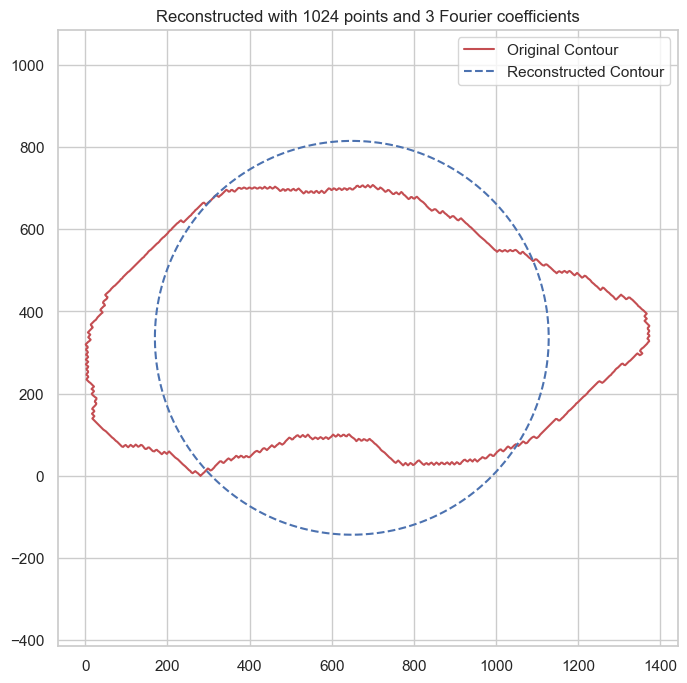

In [23]:
# Settings for the number of sampled points and Fourier coefficients
num_sampled_points = 1024
num_fourier_coefficients = 3

# Path to the image file
image_path = 'processed_[1]_re.png'

# Process the image and plot the contours
process_image(image_path, num_sampled_points, num_fourier_coefficients)